In [43]:
import requests
import bs4

In [44]:
# creating empty lists
pages, prices, ratings, title, urls = [],[],[],[],[]

# number of pages to be selected
no_of_pages = 1

# looping through the pages and selecting accordingly
for i in range(1,no_of_pages+1):
    url = f'http://books.toscrape.com/catalogue/page-{i}.html'
    pages.append(url)
    

In [45]:
# showing the number of pages extracted
print(f'Number of pages: {len(pages)}')

Number of pages: 1


In [46]:
# looping through the pages to add them to soup
for item in pages:
    page = requests.get(item)
    soup = bs4.BeautifulSoup(page.text)
    
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   All products | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="24th Jun 2016 09:30" name="created"/>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="NOARCHIVE,NOCACHE" name="robots"/>
  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
  <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
  <link href="../static/oscar/favicon.ico" rel="shortcut icon"/>
  <link href="../static/oscar/css/styles.css" rel="stylesheet" typ

In [47]:
# Getting the titles of the books
for t in soup.findAll('h3'):
    titles = t.getText()
    title.append(titles)

In [48]:
title

['A Light in the ...',
 'Tipping the Velvet',
 'Soumission',
 'Sharp Objects',
 'Sapiens: A Brief History ...',
 'The Requiem Red',
 'The Dirty Little Secrets ...',
 'The Coming Woman: A ...',
 'The Boys in the ...',
 'The Black Maria',
 'Starving Hearts (Triangular Trade ...',
 "Shakespeare's Sonnets",
 'Set Me Free',
 "Scott Pilgrim's Precious Little ...",
 'Rip it Up and ...',
 'Our Band Could Be ...',
 'Olio',
 'Mesaerion: The Best Science ...',
 'Libertarianism for Beginners',
 "It's Only the Himalayas"]

In [49]:
# getting prices
for p in soup.find_all('p', class_='price_color'):
    price= p.get_text()
    prices.append(price)
    
print(prices)

['Â£51.77', 'Â£53.74', 'Â£50.10', 'Â£47.82', 'Â£54.23', 'Â£22.65', 'Â£33.34', 'Â£17.93', 'Â£22.60', 'Â£52.15', 'Â£13.99', 'Â£20.66', 'Â£17.46', 'Â£52.29', 'Â£35.02', 'Â£57.25', 'Â£23.88', 'Â£37.59', 'Â£51.33', 'Â£45.17']


In [50]:
# getting the ratings
for s in soup.find_all('p', class_='star-rating'):
    for k, v in s.attrs.items():
        star=v[1]
        ratings.append(star)

In [51]:
# getting the images

for i in soup.find_all('div', class_='image_container'):
    tags = i.find('img', class_='thumbnail')
    # print(tags['src'])
    links = 'https://books.toscrape.com/'+ str(tags['src'])
    newlinks = links.replace('/..', '') # to get rid of the 2 dots out there
    urls.append(newlinks)

print(urls)


['https://books.toscrape.com/media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg', 'https://books.toscrape.com/media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg', 'https://books.toscrape.com/media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg', 'https://books.toscrape.com/media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg', 'https://books.toscrape.com/media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c12a6.jpg', 'https://books.toscrape.com/media/cache/68/33/68339b4c9bc034267e1da611ab3b34f8.jpg', 'https://books.toscrape.com/media/cache/92/27/92274a95b7c251fea59a2b8a78275ab4.jpg', 'https://books.toscrape.com/media/cache/3d/54/3d54940e57e662c4dd1f3ff00c78cc64.jpg', 'https://books.toscrape.com/media/cache/66/88/66883b91f6804b2323c8369331cb7dd1.jpg', 'https://books.toscrape.com/media/cache/58/46/5846057e28022268153beff6d352b06c.jpg', 'https://books.toscrape.com/media/cache/be/f4/bef44da28c98f905a3ebec0b87be8530.jpg', 'https://books.toscrape.com/media/cache/10/48/1048f63d3b5061cd2f

In [53]:
# data preprocessing on scraped data

web_data = {'Title':title, 'Price':prices, 'Ratings':ratings, 'URL':urls}

import pandas as pd

df = pd.DataFrame(web_data)

In [54]:
df.head()

,Title,Price,Ratings,URL
0,A Light in the ...,Â£51.77,Three,https://books.toscrape.com/media/cache/2c/da/2...
1,Tipping the Velvet,Â£53.74,One,https://books.toscrape.com/media/cache/26/0c/2...
2,Soumission,Â£50.10,One,https://books.toscrape.com/media/cache/3e/ef/3...
3,Sharp Objects,Â£47.82,Four,https://books.toscrape.com/media/cache/32/51/3...
4,Sapiens: A Brief History ...,Â£54.23,Five,https://books.toscrape.com/media/cache/be/a5/b...


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    20 non-null     object
 1   Price    20 non-null     object
 2   Ratings  20 non-null     object
 3   URL      20 non-null     object
dtypes: object(4)
memory usage: 768.0+ bytes


In [56]:
# change index to start from 1
df.index += 1
df

,Title,Price,Ratings,URL
1,A Light in the ...,Â£51.77,Three,https://books.toscrape.com/media/cache/2c/da/2...
2,Tipping the Velvet,Â£53.74,One,https://books.toscrape.com/media/cache/26/0c/2...
3,Soumission,Â£50.10,One,https://books.toscrape.com/media/cache/3e/ef/3...
4,Sharp Objects,Â£47.82,Four,https://books.toscrape.com/media/cache/32/51/3...
5,Sapiens: A Brief History ...,Â£54.23,Five,https://books.toscrape.com/media/cache/be/a5/b...
6,The Requiem Red,Â£22.65,One,https://books.toscrape.com/media/cache/68/33/6...
7,The Dirty Little Secrets ...,Â£33.34,Four,https://books.toscrape.com/media/cache/92/27/9...
8,The Coming Woman: A ...,Â£17.93,Three,https://books.toscrape.com/media/cache/3d/54/3...
9,The Boys in the ...,Â£22.60,Four,https://books.toscrape.com/media/cache/66/88/6...
10,The Black Maria,Â£52.15,One,https://books.toscrape.com/media/cache/58/46/5...


In [57]:
df['Price'] = df['Price'].str.replace('Â£', '')
df

,Title,Price,Ratings,URL
1,A Light in the ...,51.77,Three,https://books.toscrape.com/media/cache/2c/da/2...
2,Tipping the Velvet,53.74,One,https://books.toscrape.com/media/cache/26/0c/2...
3,Soumission,50.10,One,https://books.toscrape.com/media/cache/3e/ef/3...
4,Sharp Objects,47.82,Four,https://books.toscrape.com/media/cache/32/51/3...
5,Sapiens: A Brief History ...,54.23,Five,https://books.toscrape.com/media/cache/be/a5/b...
6,The Requiem Red,22.65,One,https://books.toscrape.com/media/cache/68/33/6...
7,The Dirty Little Secrets ...,33.34,Four,https://books.toscrape.com/media/cache/92/27/9...
8,The Coming Woman: A ...,17.93,Three,https://books.toscrape.com/media/cache/3d/54/3...
9,The Boys in the ...,22.60,Four,https://books.toscrape.com/media/cache/66/88/6...
10,The Black Maria,52.15,One,https://books.toscrape.com/media/cache/58/46/5...


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 1 to 20
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    20 non-null     object
 1   Price    20 non-null     object
 2   Ratings  20 non-null     object
 3   URL      20 non-null     object
dtypes: object(4)
memory usage: 772.0+ bytes


In [61]:
df['Price'] = df['Price'].astype(float)

In [62]:
df.sort_values(by='Price', ascending=False)

,Title,Price,Ratings,URL
16,Our Band Could Be ...,57.25,Three,https://books.toscrape.com/media/cache/54/60/5...
5,Sapiens: A Brief History ...,54.23,Five,https://books.toscrape.com/media/cache/be/a5/b...
2,Tipping the Velvet,53.74,One,https://books.toscrape.com/media/cache/26/0c/2...
14,Scott Pilgrim's Precious Little ...,52.29,Five,https://books.toscrape.com/media/cache/94/b1/9...
10,The Black Maria,52.15,One,https://books.toscrape.com/media/cache/58/46/5...
1,A Light in the ...,51.77,Three,https://books.toscrape.com/media/cache/2c/da/2...
19,Libertarianism for Beginners,51.33,Two,https://books.toscrape.com/media/cache/0b/bc/0...
3,Soumission,50.10,One,https://books.toscrape.com/media/cache/3e/ef/3...
4,Sharp Objects,47.82,Four,https://books.toscrape.com/media/cache/32/51/3...
20,It's Only the Himalayas,45.17,Two,https://books.toscrape.com/media/cache/27/a5/2...


In [63]:
# change ratings to numbers instead of words
rating_dict = {'One':1, 'Two':2, 'Three':3,'Four':4,'Five':5}

df['Ratings'] = df['Ratings'].replace(rating_dict)
df

,Title,Price,Ratings,URL
1,A Light in the ...,51.77,3,https://books.toscrape.com/media/cache/2c/da/2...
2,Tipping the Velvet,53.74,1,https://books.toscrape.com/media/cache/26/0c/2...
3,Soumission,50.10,1,https://books.toscrape.com/media/cache/3e/ef/3...
4,Sharp Objects,47.82,4,https://books.toscrape.com/media/cache/32/51/3...
5,Sapiens: A Brief History ...,54.23,5,https://books.toscrape.com/media/cache/be/a5/b...
6,The Requiem Red,22.65,1,https://books.toscrape.com/media/cache/68/33/6...
7,The Dirty Little Secrets ...,33.34,4,https://books.toscrape.com/media/cache/92/27/9...
8,The Coming Woman: A ...,17.93,3,https://books.toscrape.com/media/cache/3d/54/3...
9,The Boys in the ...,22.60,4,https://books.toscrape.com/media/cache/66/88/6...
10,The Black Maria,52.15,1,https://books.toscrape.com/media/cache/58/46/5...


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 1 to 20
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Title    20 non-null     object 
 1   Price    20 non-null     float64
 2   Ratings  20 non-null     int64  
 3   URL      20 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 772.0+ bytes


In [65]:
df.sort_values(by='Ratings',ascending=False)

,Title,Price,Ratings,URL
13,Set Me Free,17.46,5,https://books.toscrape.com/media/cache/5b/88/5...
5,Sapiens: A Brief History ...,54.23,5,https://books.toscrape.com/media/cache/be/a5/b...
15,Rip it Up and ...,35.02,5,https://books.toscrape.com/media/cache/81/c4/8...
14,Scott Pilgrim's Precious Little ...,52.29,5,https://books.toscrape.com/media/cache/94/b1/9...
4,Sharp Objects,47.82,4,https://books.toscrape.com/media/cache/32/51/3...
7,The Dirty Little Secrets ...,33.34,4,https://books.toscrape.com/media/cache/92/27/9...
9,The Boys in the ...,22.60,4,https://books.toscrape.com/media/cache/66/88/6...
12,Shakespeare's Sonnets,20.66,4,https://books.toscrape.com/media/cache/10/48/1...
1,A Light in the ...,51.77,3,https://books.toscrape.com/media/cache/2c/da/2...
16,Our Band Could Be ...,57.25,3,https://books.toscrape.com/media/cache/54/60/5...


In [70]:
df.corr()

,Price,Ratings
Price,1.000000,-0.075857
Ratings,-0.075857,1.000000


<AxesSubplot:xlabel='Ratings', ylabel='Price'>

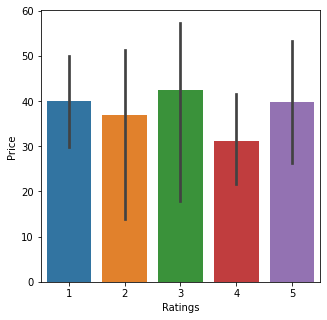

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(5,5))

sns.barplot(data=df, x='Ratings', y='Price')

<AxesSubplot:>

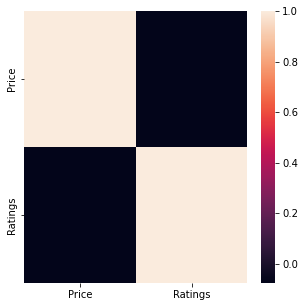

In [68]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr())